# 2.1. О чём этот модуль
Модуль 2 посвящён методам предобработки данных.

Предобработка данных — это действия с данными перед передачей их модели, могут включать в себя центрирование, нормализацию, сдвиг, вращение, обрезку. Часто требуется при необходимости очистить данные от ненужного или дополнить какой-то информацией.

План модуля:
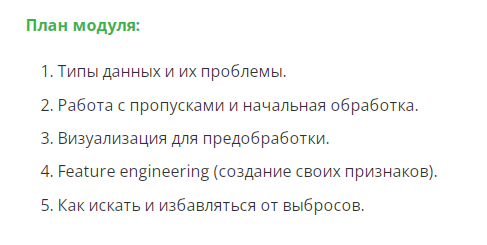

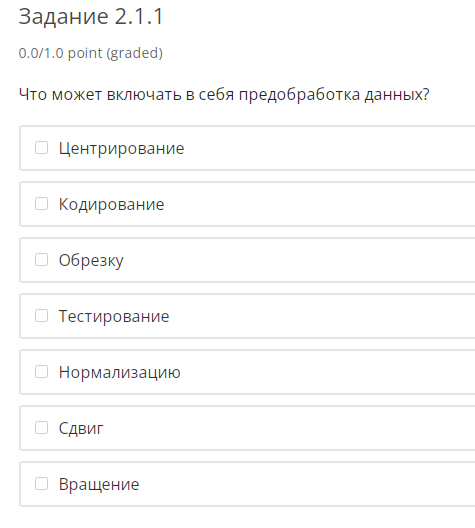

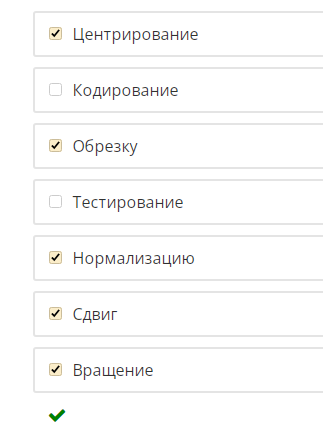

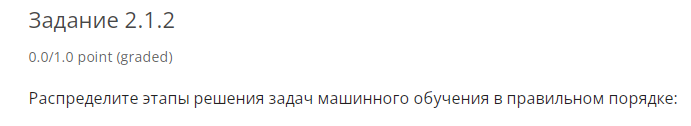

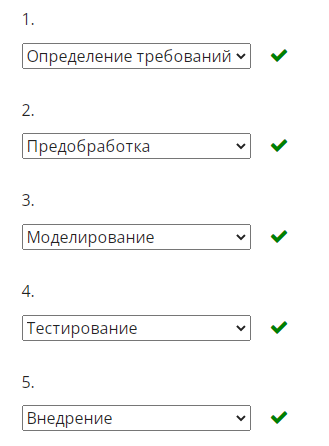

# 2.2. Типы данных
### Ординальный(Порядковый), Категориальный(Номинальный), Числовой(Количественный)
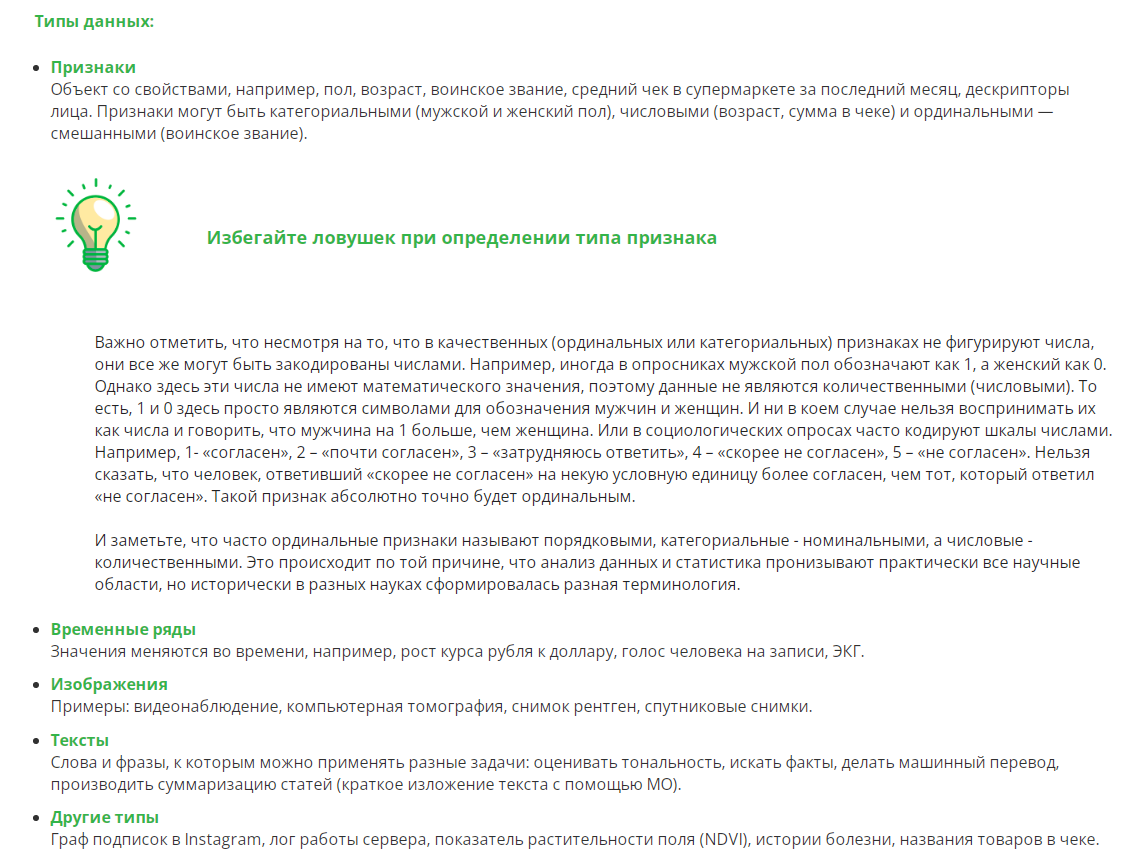

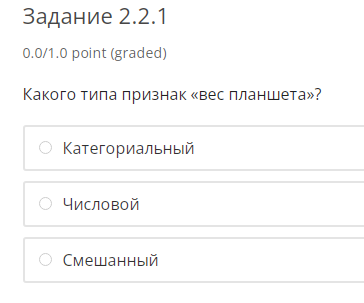

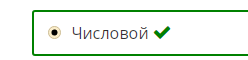

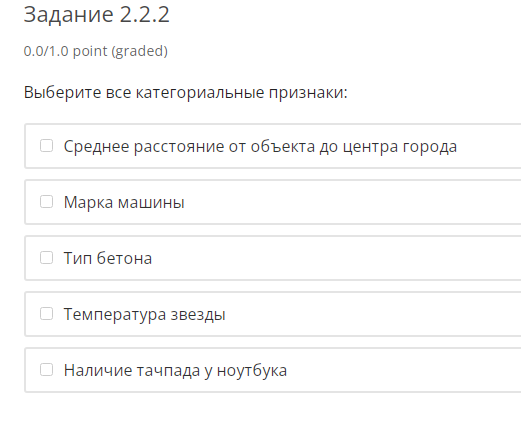

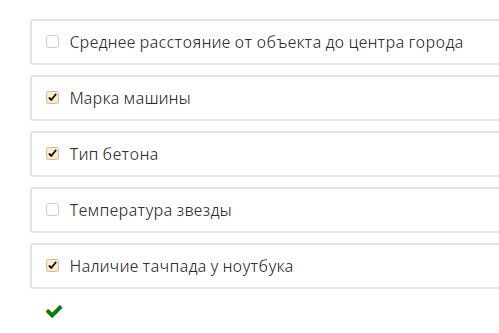

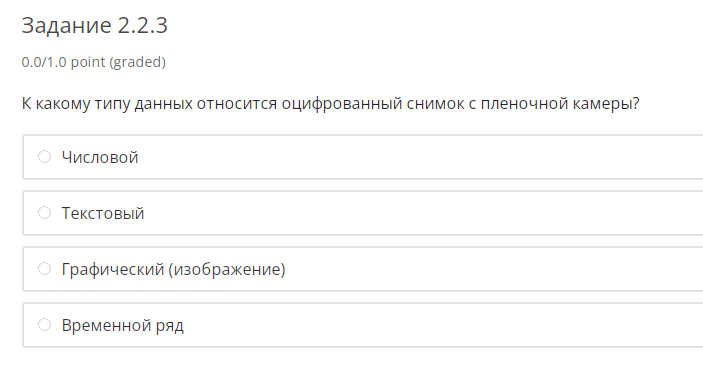

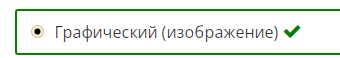

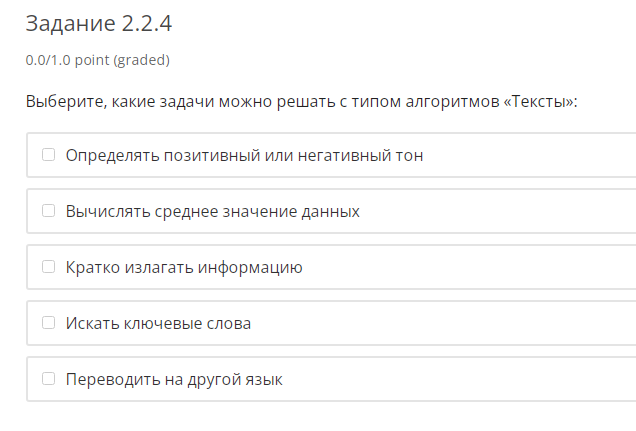

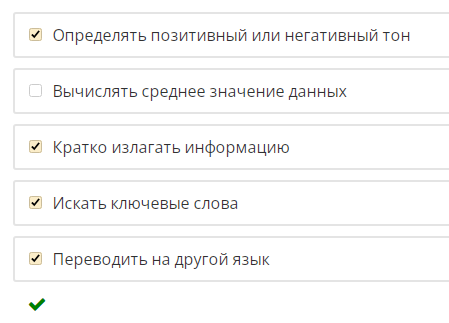

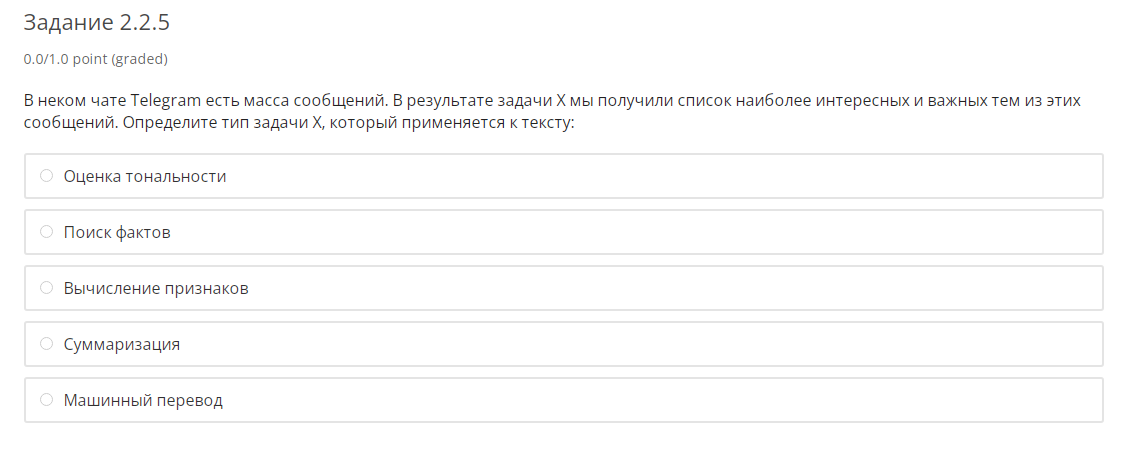

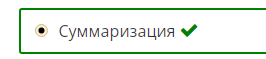

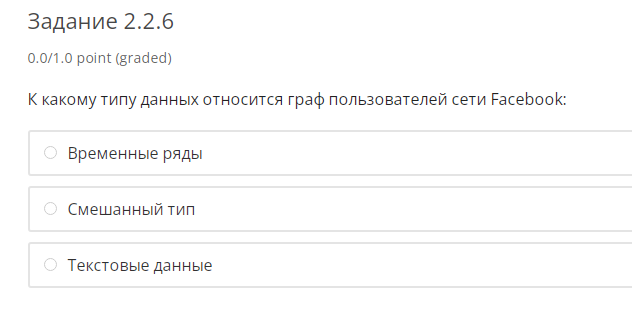

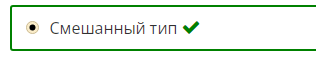

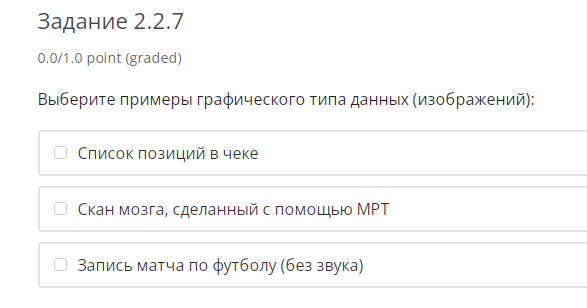

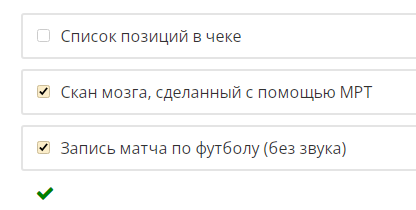

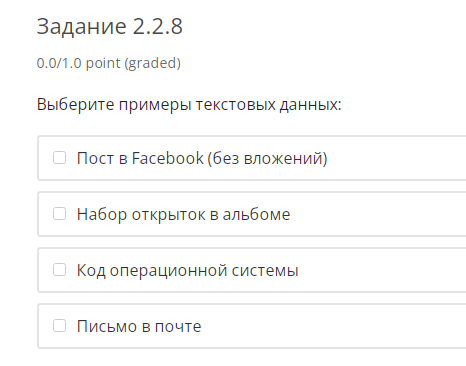

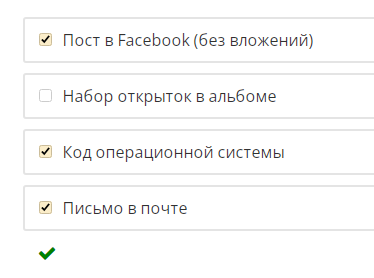

# 2.3. Практика
Определять правильно типы признаков в данных очень важно, так как не все методы мы можем применять к любым типам признаков. Кроме того, не все признаки можно сразу использовать - некоторые требуют дополнительной предобработки. Поэтому прежде, чем приступить к решению задачи, необходимо посмотреть на датасет и понять, с какими признаками вы имеете дело.

Один из крупных российских банков предоставил данные о московских квартирах, выставленных на продажу:

https://drive.google.com/file/d/1Z6cQB7THbrKp9o3AUEtV6E_rNWQUxp5Y/view

Давайте для начала откроем наш файл и посмотрим на данные, которые нам предложены:

In [3]:
import pandas as pd
data = pd.read_csv('data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [4]:
# Для того, чтобы посмотреть на типы данных, запросим информацию о датасете:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

Обратите внимание на типы признаков. Категориальные и ординальные чаще всего закодированы как признаки типа "object" (но помните, что иногда категориальные и ординальные могут быть закодированы и числами, поэтому в будущем всегда внимательно смотрите на полученные данные!)

# Задание 2.3.1
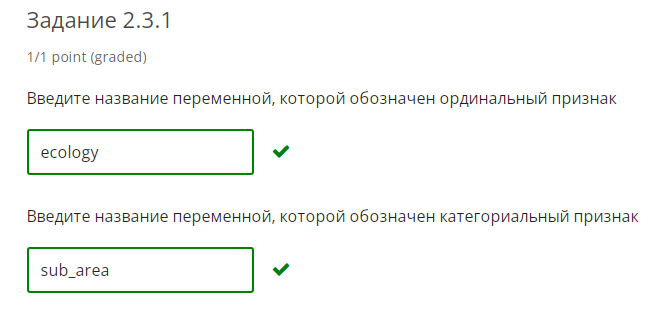

# 2.4. Проблемы данных
Проблемные данные:
- Неполные данные:  
заказчик выслал не все данные, в них есть пропуски, нет данных за определённый период, есть данные только для части задач. Например, есть рейсы только одной авиакомпании, есть суммы покупок с января по март и с июня по декабрь.
- Грязные данные:  
— данные в плохом или разном формате;  
— в данных есть мусор, например, смешиваются русские и английские буквы, данные в виде шифра,  
— разные меры данных, например, часть в метрах, часть в футах;   
— данные старые, значения признака перемешиваются.  

- Плохая разметка:  
в данных есть ошибки, разная оценка данных из-за человеческого фактора, разметка не соответствует реальности, размеченных данных очень много — должна быть «золотая середина». Чем лучше хотите получить разметку, тем больше времени придётся потратить.
- Данные с утечкой:  
в данных нужно избегать признаков, от которых явно зависит целевая переменная. Такая ситуация приводит к тому, что во время обучения модель всё предсказывает, но в боевых условиях бесполезна.

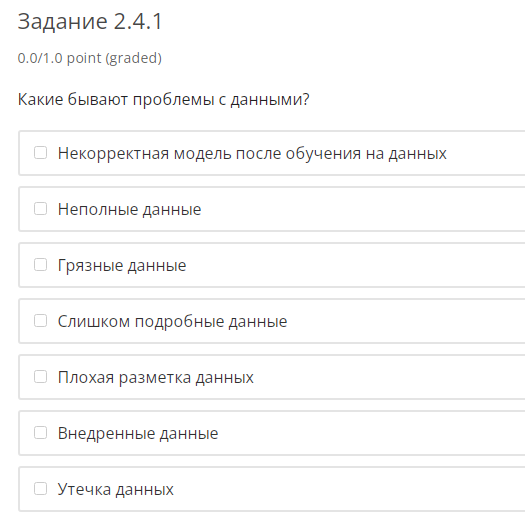

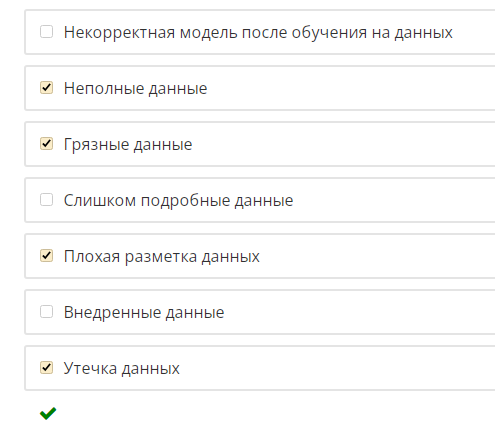

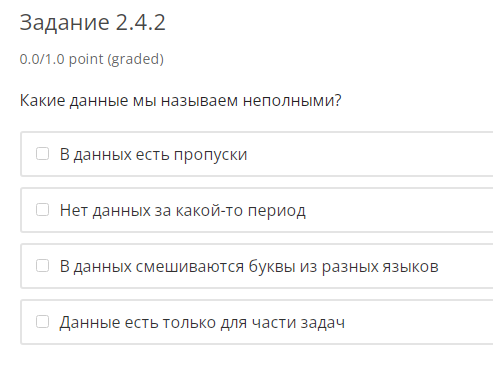

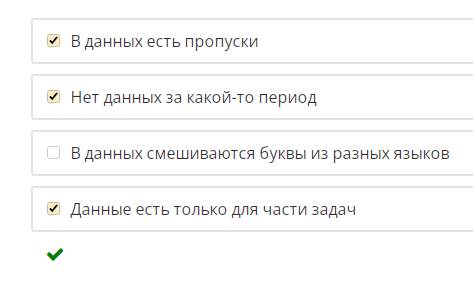

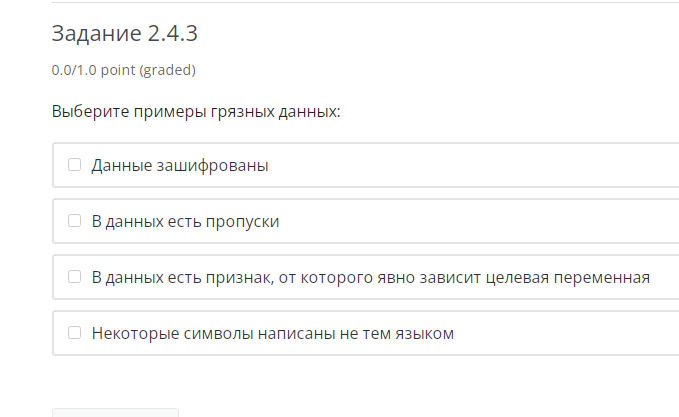

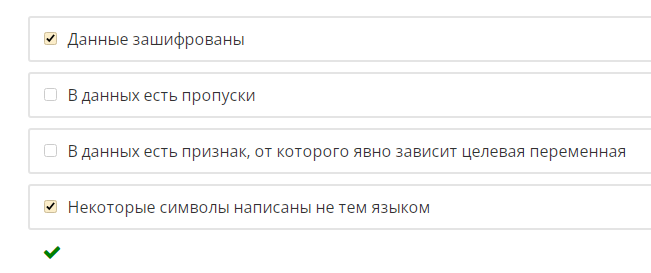

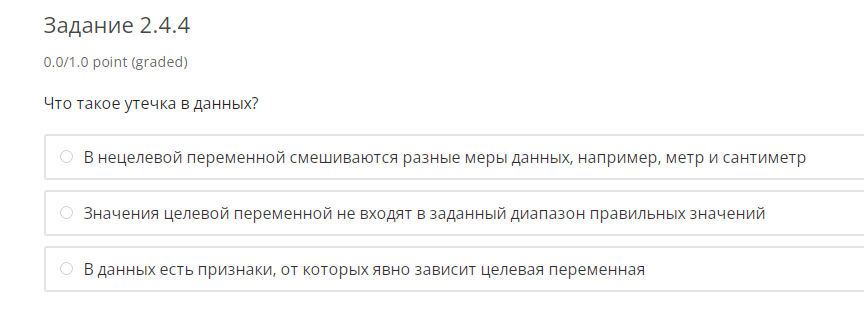

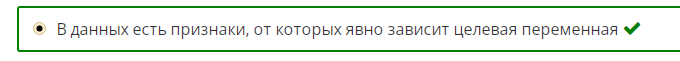

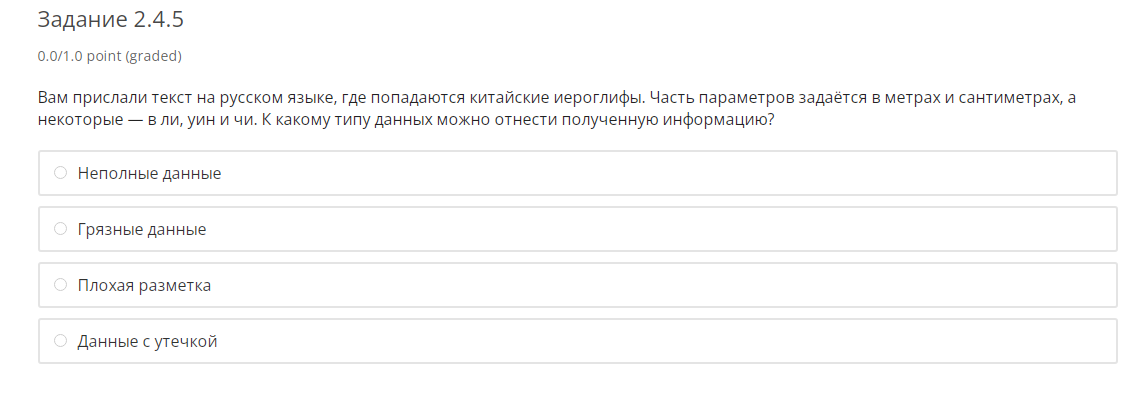

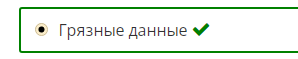

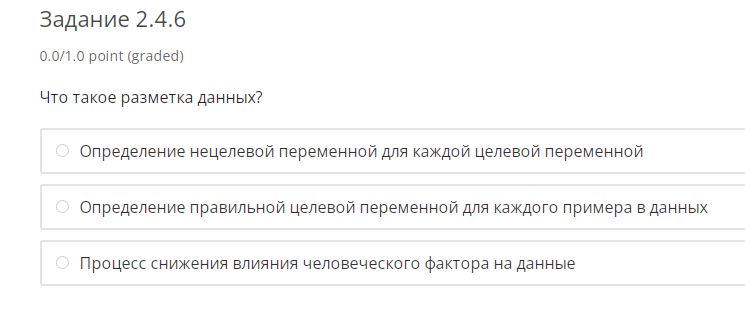

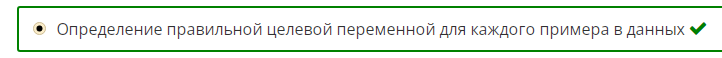

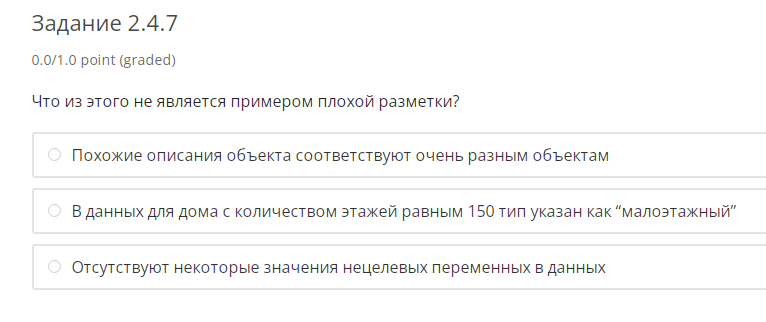

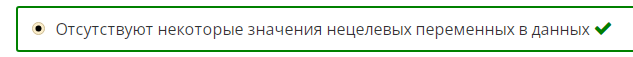

# 2.5. Работа с пропусками
**Пропуски** — отсутствие значений в данных. Обычно это случается из-за ошибок человека: забыли, какие данные не внесли, не всё перенесли из другого документа, неверно заполнили документ, случайно удалили часть данных. Например, при опросе респонденты отвечали только на часть вопросов, не указывая какие-то данные.

### Что делать с пропусками?

- Удалить пропуски: удалить строки с пропусками, если таких строк немного, или столбцы (признаки) в данных, если их много, и это не повлияет на результат в целом.
- Заменить пропуски: заменить на среднее значение (медианой) или на самый часто попадающийся вариант. Например, опрос респондентов проходил в Москве, вероятнее, большинство — жители города, а не туристы. Значит, в графе город можно поставить «Москва». Или же по другим данным в документе можно восстановить пол людей, которые его не указали.
- Записать новое значение: например, вместо пропуска в столбце «Пол» указать «не определён».
- Заменить алгоритмами МО: признак можно считать целевой переменной и обучать модель, чтобы предсказать пропущенные значения.

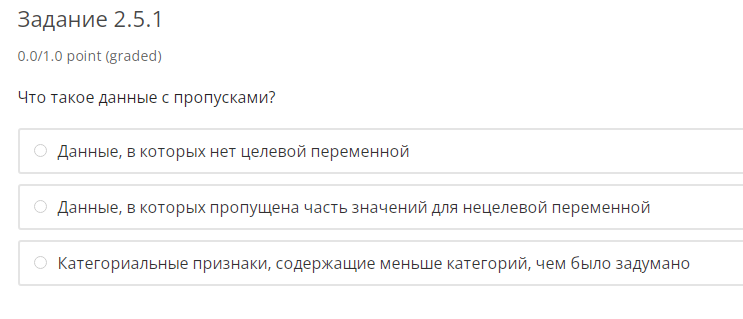

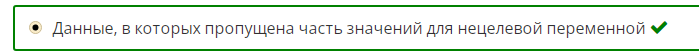

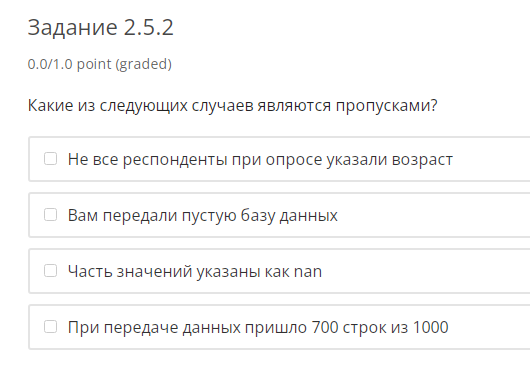


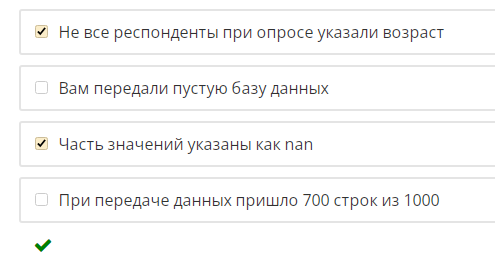

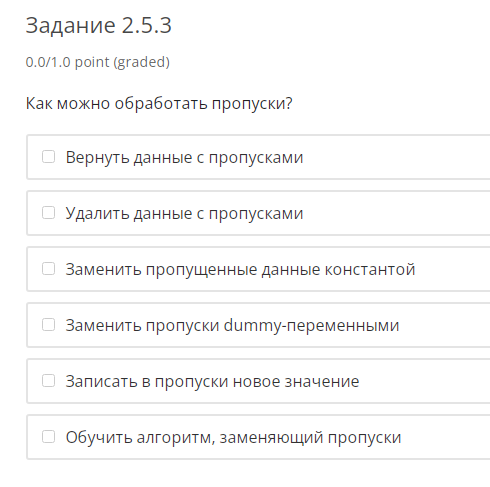

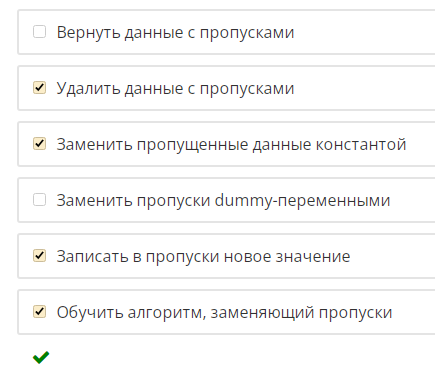

# 2.6. Практика

In [5]:
import pandas as pd
import numpy as np
# Создадим тестовый набор данных:

test_data = pd.DataFrame([[1, 2, np.nan], 
                          [3, np.nan, 4],
                          [0, 1, 2]], 
                         columns=['one', 'two', 'three'])
# В данных часто бывают пропуски, в Pandas их можно найти с помощью метода .isna():

display(test_data.isna())
# В местах пропусков у нас появится значение True.

# Столбцы или строки с пропусками мы можем удалить с помощью метода .dropna(). 
#При axis=0 удаляются строки, при 1 — столбцы, по умолчанию значение равно 0:
display(test_data.dropna(axis=0))

#Удаление строк и столбцов — грубое решение, из-за этого можно случайно убрать нужные данные. 
#Поэтому лучше заменять пропуски статистиками или константным значением с помощью метода fillna():
display(test_data.fillna(-1))

,one,two,three
0,False,False,True
1,False,True,False
2,False,False,False


,one,two,three
2,0,1.0,2.0


,one,two,three
0,1,2.0,-1.0
1,3,-1.0,4.0
2,0,1.0,2.0


Полные данные в m2_part1_nans.ipynb  
Какими статистиками можно заменить пропуски:
- среднее значение np.mean();
- максимальное значение np.max();
- минимальное значение np.min();
- медиана np.median().

Для удобства некоторые методы можно вызвать прямо у столбцов.  

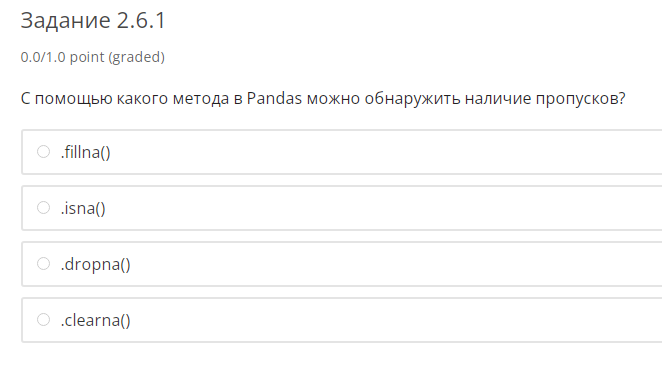

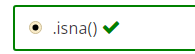

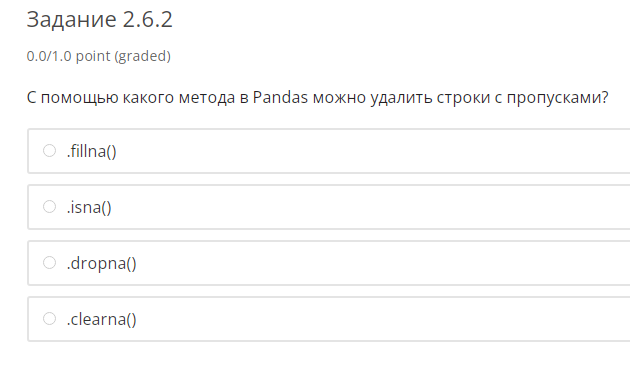

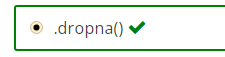

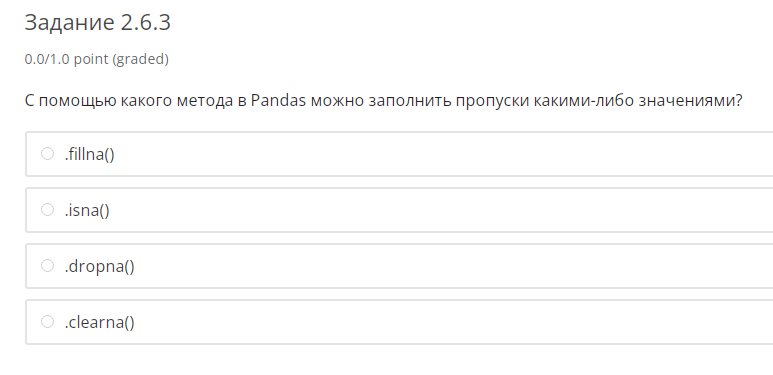

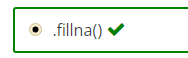

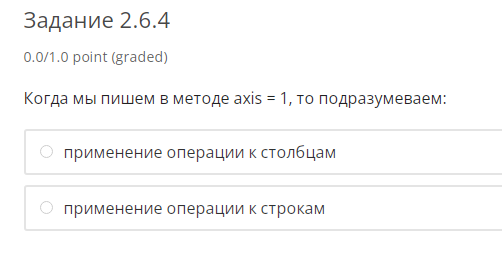

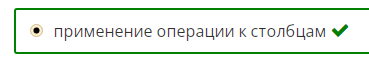

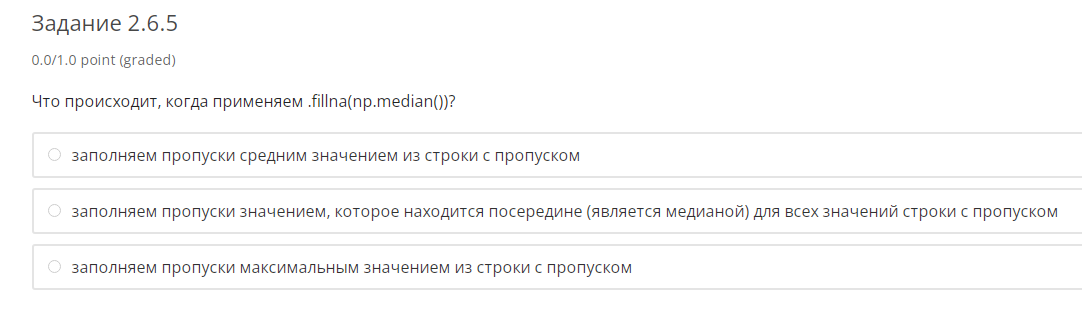

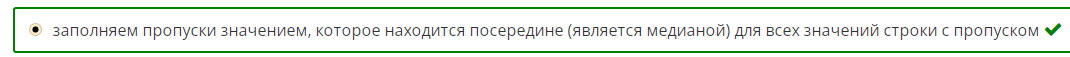

# Задание 2.6.6
Загрузите данные train.csv (https://drive.google.com/file/d/1wbB8sqdz667_SUDISF57qSaSAUhtwlmP/view).  
Найдите признак, обозначающий штат.  
Затем найдите значение, которое встречается чаще всего.  
Замените пропуски этим значением и запишите получившийся признак в переменную result.


In [6]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже
result = vis_data.state.value_counts().index[0]
result = vis_data.state.fillna(result)

In [7]:
vis_data.info()
display(result.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

164365    MI
60261     MI
94414     MI
196626    MI
244240    MI
249566    MI
89084     CA
103900    MI
107530    MI
216520    MI
Name: state, dtype: object

# Задание 2.6.7
Продолжим готовить к анализу наш Data set (https://drive.google.com/file/d/1Z6cQB7THbrKp9o3AUEtV6E_rNWQUxp5Y/view), посвященный квартирам, выставленным на продажу.  
Избавимся от пропусков. Просто удалять данные с пропусками довольно грубо. Однако если у вас большое количество объектов, и лишь крайне малая их доля имеет пропущенные значения, то это возможное допущение.  
Поступим здесь таким образом. Нас будут интересовать только те квартиры, про которые продавцы заполнили все данные.  
Удалите, пожалуйста, все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

In [8]:
data = pd.read_csv('data_flats.csv',sep=";")
# data
data = data.dropna()
display(sorted(data.count(), reverse=True)[0])


13652

# 2.7. Начальная обработка
Некоторые алгоритмы чувствительны к **масштабу признаков**: если масштаб разный — алгоритмы хуже сходятся к оптимальным значениям. Один из способов обработки данных — **нормализация** — процесс приведения данных к одному масштабу, обеспечивает лучшие условия выборки, изменения, удаления данных.

Необходимость нормализации данных объясняется сутью используемых алгоритмов и математических моделей. Из-за того, что данные могут описывать совершенно разные явления и показатели, их значения могут различаться в несколько порядков. Например, представим, что в датасете о физических данных человека есть одновременно его вес в граммах и концентрация глюкозы в крови (которая выражается в тысячных). Или, к примеру, мы изучаем состояние экологии города и получаем данные сразу о концентрации вредного вещества (в тысячных процента) и о давлении (в сто тысяч паскалей). Тогда наши значения признаков будут отличаться в миллионы (или даже десятки миллионов раз!). К сожалению, работа математических моделей на таких данных даст нерелевантные результаты, и окажется просто бесполезной. Это происходит по той причине, что большинство методов чувствительны к диапазону входных данных и крайне желательно, чтобы он был как можно меньше. То есть, чтобы все признаки были приведены к некоторой единой системе.

### Базовые методы нормализации:

- MinMax нормализация — приведение данных к масштабу между 0 и 1.
- Стандартная нормализация — данные имеют среднее 0 и стандартное отклонение 1.

Иногда данные лучше удалить, если они не несут пользы. Например, столбец считался по ошибке и содержит мусор, или признак не имеет полезной информации, или столбец содержит всегда одинаковое значение.

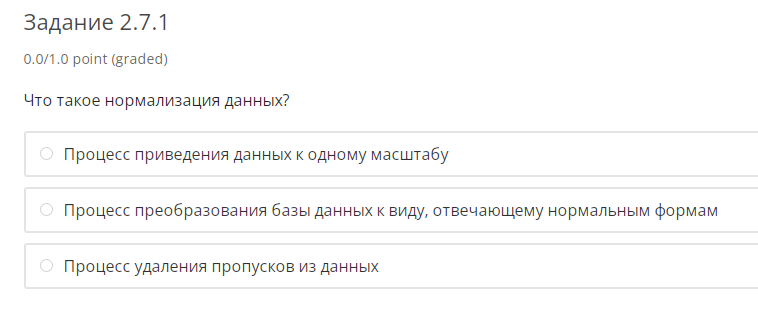

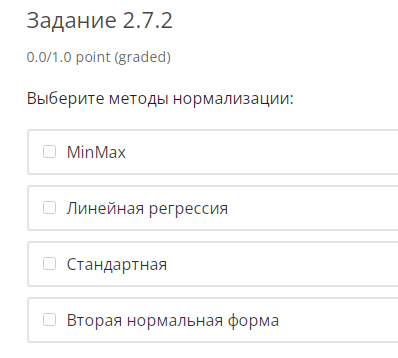

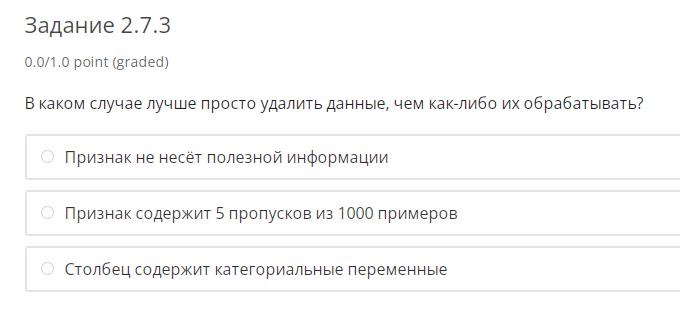

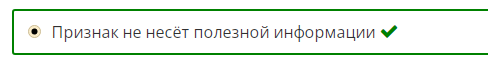

# 2.8. Практика
Полные данные в ноутбуке m2_part2_normalization.ipynb  
Будем использовать пример из прошлого урока, изменив масштаб данных. Посмотрим, как с помощью методов нормализации, можно изменять масштаб признаков. В большинстве случаев хуже от этого метода не бывает, поэтому рекомендуется применять его всегда.

Один из стандартных способов нормализации — **minmax** нормализация, которая приводит независимо каждый признак к значению между 0 и 1. Для каждого признака мы находим минимальное и максимальное значение, из всех значений вычитаем минимальное значение и делим это на разницу между максимальным и минимальным значениями.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 1.        ,        nan],
       [1.        ,        nan, 1.        ],
       [0.        , 0.        , 0.        ]])

Ещё один вид нормализации — **std нормализация**. Мы находим среднее значение для признака, затем стандартное отклонение, из каждого значения в текущем признаке вычитаем среднее значение для всего признака и делим на стандартное отклонение.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(test_data)

array([[-0.26726124,  1.        ,         nan],
       [ 1.33630621,         nan,  1.        ],
       [-1.06904497, -1.        , -1.        ]])

**MinMaxScaler** и **StandardScaler** сохраняют параметры, с которыми проводят нормализацию. Поэтому после нормализации признаков в тренировочной выборке нужно будет применить ту же нормализацию с валидационными и тестовыми данными.

Если признаки не несут важной информации или попали в набор данных по ошибке, для их удаления можно применять метод .drop ().

In [11]:
# Пример:
test_data.drop('one', axis=1)

,two,three
0,2.0,NaN
1,NaN,4.0
2,1.0,2.0


Функция **RobustScaler()** подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам. Данная функция нам понадобится при выполнении задания 3.5.1 (Юнит модуля "3A.5 Линейная регрессия. Предобработка").

 Подробности и сравнение работы разных алгоритмов нормализации данных можно посмотреть в документации sklearn(https://scikit-learn.ru/6-3-preprocessing-data/).

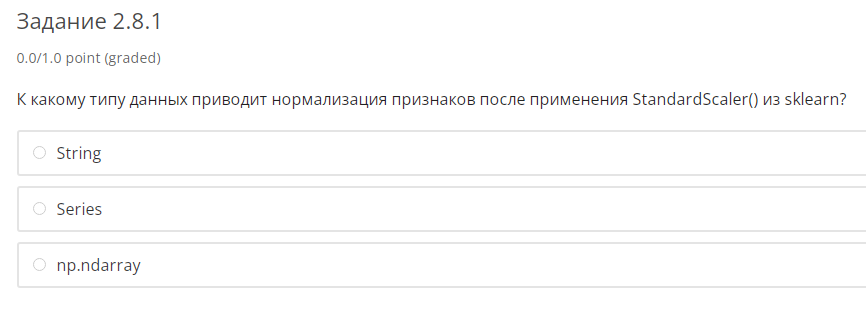

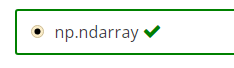

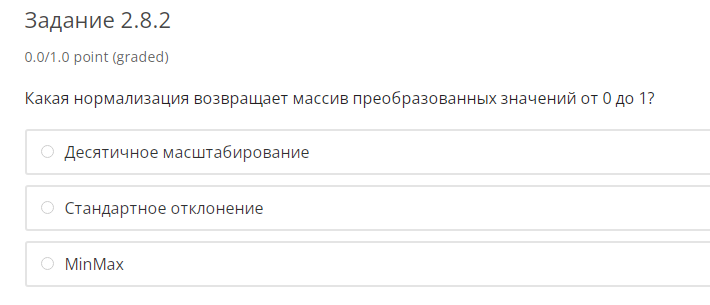

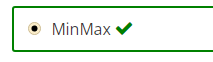

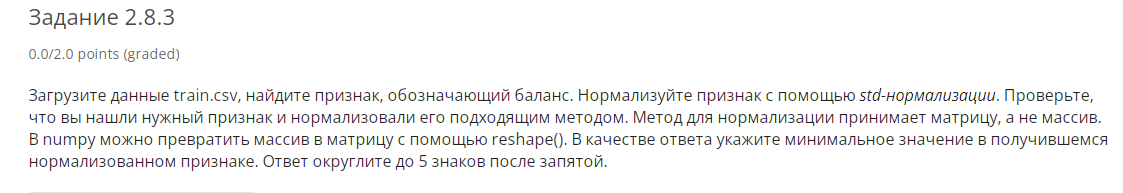

In [12]:
from sklearn.preprocessing import StandardScaler

vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
size_balance = len(vis_data.balance_due)
balance = np.reshape(list(vis_data.balance_due), (-1, 1))
scaler = StandardScaler()
balance = scaler.fit_transform(balance)
print(round(np.min(balance), 5))


-13.14733


# 2.9. Визуализация
Один из способов визуализации — **гистограмма** — вид диаграммы, показывающий данные в форме столбцов. Демонстрирует распределение данных по выборке внутри столбца и значений в признаке. Позволяет увидеть проблемы или некорректные значения в данных, преобразовать их в наглядную форму и распределить, чтобы облегчить работу.

**Correlation plot** — корреляционный график. Признаки в данных могут иметь сильную корреляцию, то есть линейную зависимость. Если зависимость большая, признаки несут избыточную информацию, поэтому скореллированные признаки лучше удалять.

### Дополнительные материалы 
 
Кроме визуализации распределения числовых признаков с помощью гистограммы, возможно еще представление с использованием ящика с усами (или боксплота). Их преимущество состоит в том, что с помощью одной диаграммы можно представить основные описательные статистики: медиану, а также верхний (третий) и нижний( первый) квартили. Напомним, что данные показатели являются робастными (устойчивыми к выбросам), что позволяет представлять с помощью этой диаграммы даже признаки с наличием выбросов. Причем, выбросы будут обозначены с помощью кружочков. То есть, по сути, с помощью построения боксплота можно даже выявить наличие выбросов в ваших данных.
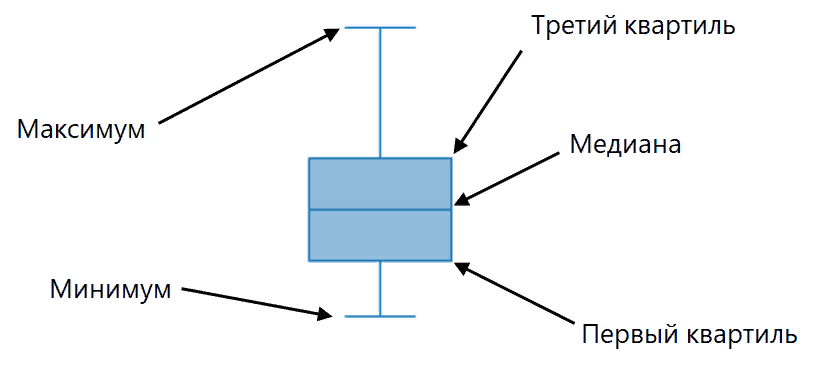
Также преимущество боксплота заключается в том, что можно сравнивать на одном графике данные сразу для нескольких признаков. Например, у нас есть две группы студентов, которые написали тест, оцениваемый от 0 до 100. По этим данным мы построили диаграммы:
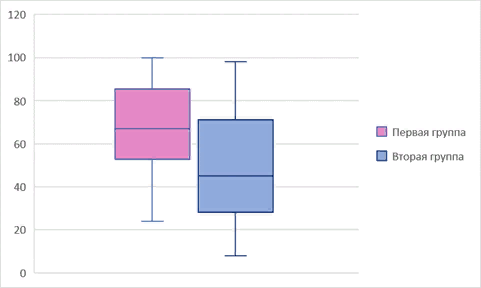
По этим диаграммам мы можем сделать вывод, что у первой группы выше наибольший результат (по сравнению со второй группой) и выше наименьший результат. Кроме того, медианное значение также выше. А у второй группы по отношению к первой разброс значений больше.

Примеры кода для построения боксплотов можно посмотреть в галерее библиотеки seaborn (https://www.python-graph-gallery.com/boxplot/):

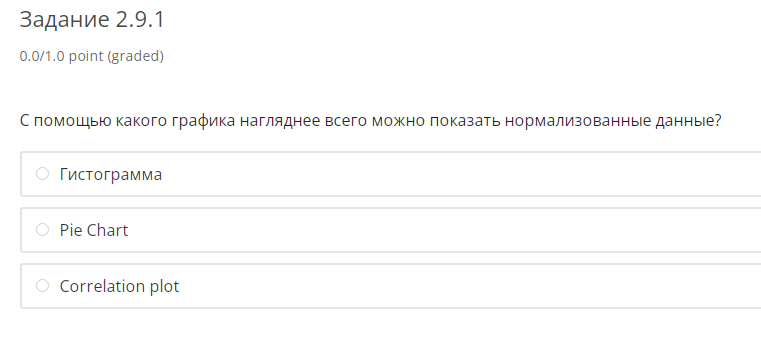

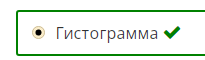

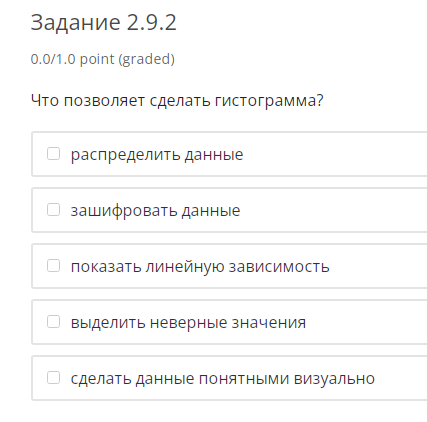

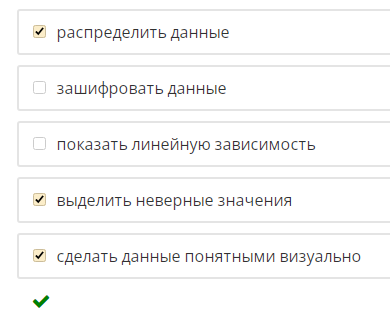

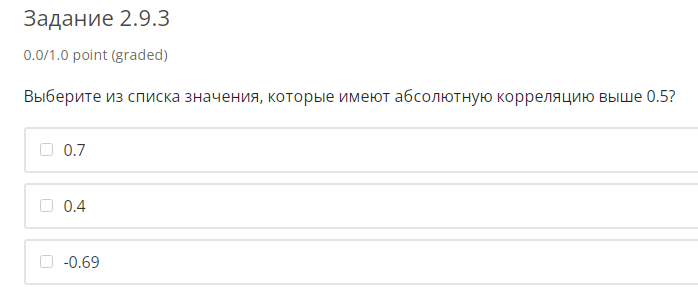

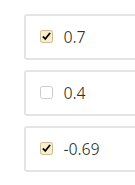

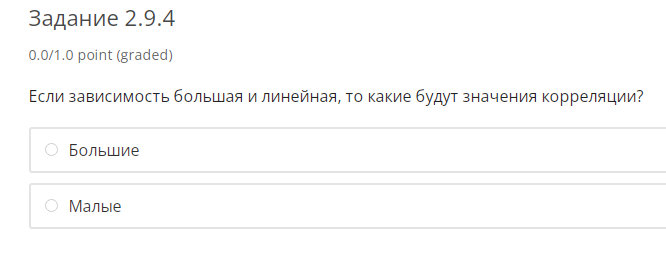

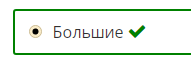

# 2.10. Практика
Основные моменты
Визуализации данных можно посветить отдельный курс, так как тема очень обширная, поэтому в рамках урока мы рассмотрим только два основных метода, с помощью которых можно начать смотреть на данные. Начнём с гистограммы, которая показывает распределение данных и выбросы.

Многие алгоритмы работают лучше, когда на вход принимают нормально распределённые данные. Один из способов сделать данные «нормальными» — взять логарифм. При этом не должно быть значений равных 0, иначе метод np.log выдаст бесконечность.

<AxesSubplot:>

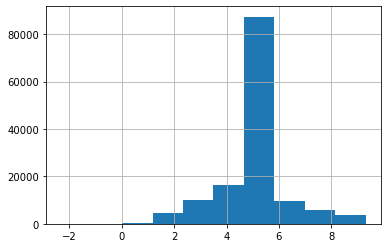

In [13]:
np.log(vis_data.balance_due[vis_data.balance_due > 0]).hist()

Если значения всё-таки начинаются с 0, то перед тем, как взять логарифм, можно прибавить к данным 1.

Другой способ — взять квадратный корень от данных:

<AxesSubplot:>

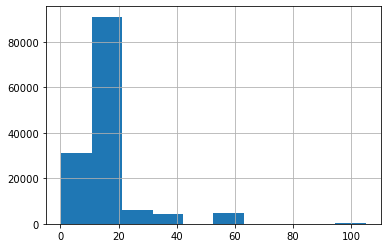

In [14]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist()

Таких способов много, вы можете их перебирать и смотреть, какой подойдёт больше.

Между некоторыми признаками есть некоторая линейная зависимость, то есть они сильно скоррелированы друг с другом. Если зависимость большая, то следует убрать часть скоррелированных признаков, так как они несут избыточную информацию. Для определения зависимости можно посчитать матрицу корреляции для признаков и построить, например, heatmap, чтобы проще было увидеть зависимость.

In [15]:
import seaborn as sns

corr = vis_data.drop(['violation_zip_code', 'payment_amount', 
                      'clean_up_cost', 
                      'violation_street_number'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ticket_id,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due
ticket_id,1.00,-0.04,-0.04,-0.01,-0.02,-0.01,0.00
admin_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
state_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
late_fee,-0.01,0.29,0.29,1.00,-0.01,0.99,0.95
discount_amount,-0.02,0.03,0.03,-0.01,1.00,0.04,-0.02
judgment_amount,-0.01,0.32,0.32,0.99,0.04,1.00,0.94
balance_due,0.00,0.28,0.28,0.95,-0.02,0.94,1.00


Ноутбук к скринкасту(m2_part3_visualization.ipynb)

Данные latlons.csv.  
Данные train(1).csv.

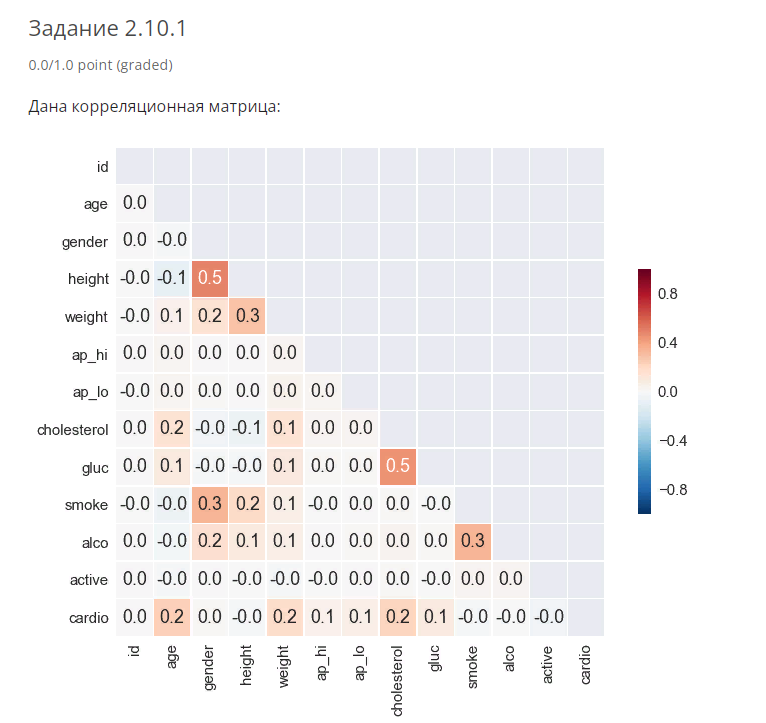
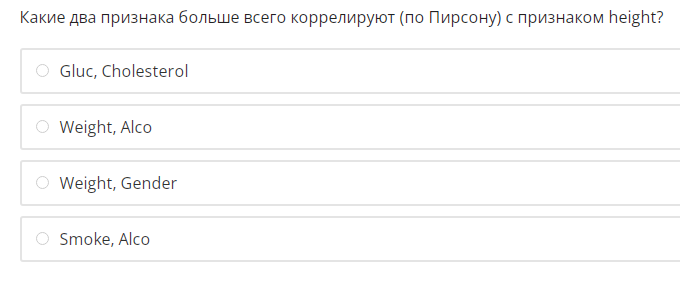

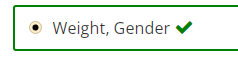

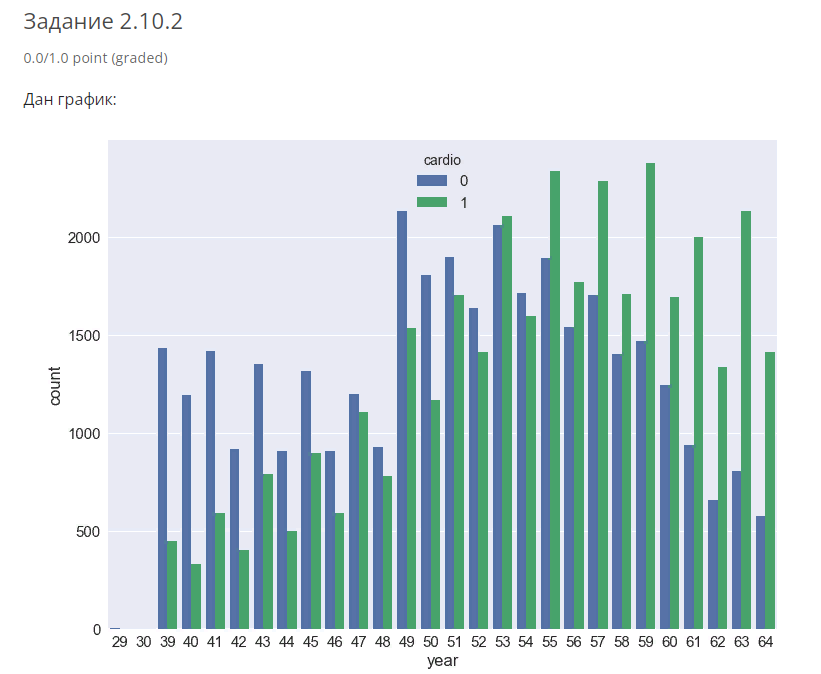
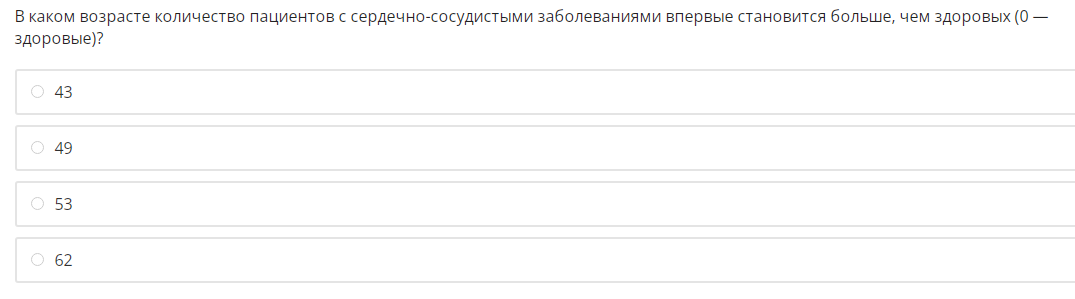

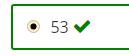

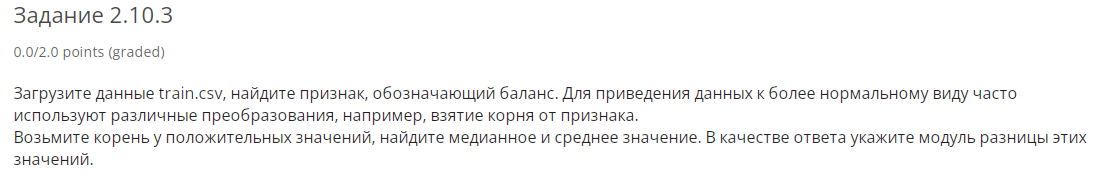

In [16]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
sqrt_balance = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0])
print(np.abs(sqrt_balance.median() - sqrt_balance.mean()))

0.4525960609393067


# Практика на реальных данных
Вернемся к первичному анализу наших данных по квартирам, выставленным на продажу. Предположим, что вы хотите проанализировать состояние цен на квартиры в нескольких  районах : "Лефортово", "Перово", "Басманное" и "Богородское". Для того, чтобы сравнить цены на квартирах в этих районах, можно использовать визуализацию с помощью боксплотов. Постройте боксплоты для распределения цен по этим районами (должно получиться четыре боксплота - по одному для каждого района). На основании полученных диаграмм ответьте на вопросы ниже.
Датасет(https://drive.google.com/file/d/1Z6cQB7THbrKp9o3AUEtV6E_rNWQUxp5Y/view)

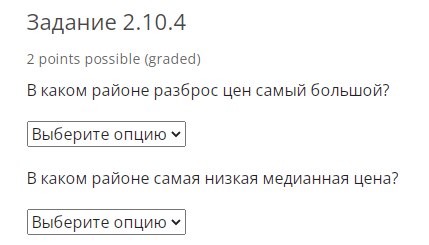

In [17]:
def transkript(lst: list) -> list:
    result = list()
    alph = {'А':'A', 'а':'a', 'Б':'B', 'б':'b', 'В':'V', 'в':'v',
       'Г':'G', 'г':'g', 'Д':'D', 'д':'d', 'Е':'E', 'е':'e', 'Ё':'E', 'ё':'e', 'Ж':'Zh', 'ж':'zh',
       'З':'Z', 'з':'z', 'И':'I', 'и':'i', 'Й':'I', 'й':'i', 'К':'K', 'к':'k', 'Л':'L', 'л':'l',
       'М':'M', 'м':'m', 'Н':'N', 'н':'n', 'О':'O', 'о':'o', 'П':'P', 'п':'p', 'Р':'R', 'р':'r', 
       'С':'S', 'с':'s', 'Т':'T', 'т':'t', 'У':'U', 'у':'u', 'Ф':'F', 'ф':'f', 'Х':'Kh', 'х':'kh',
       'Ц':'Tc', 'ц':'tc', 'Ч':'Ch', 'ч':'ch', 'Ш':'Sh', 'ш':'sh', 'Щ':'Shch', 'щ':'shch', 'Ъ':'', 'ъ':'',
        'Ы':'Y', 'ы':'y', 'Ь':'', 'ь':'', 'Э':'E', 'э':'e', 'Ю':'Iu', 'ю':'iu', 'Я':'Ia', 'я':'ia'}
    for i in range(len(lst)):
        tmp = list(lst[i])
        for j in range(len(tmp)):
            if tmp[j] in alph:
                tmp[j] = alph[tmp[j]]
        result.append(''.join(tmp))
    return result

In [18]:
pd.set_option('max_column', None)
data_flats = pd.read_csv('data_flats.csv',sep=";")
data_flats.info()
data_flats.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
27092,27097,78,78.0,10.0,Poselenie Moskovskij,NaN,0,NaN,0,0,NaN,0,0,3,3,0,2,3,2.523793,1.780698,21.368381,1.780698,1.075395,1.690124,2.166759,0.294153,0.437857,2.919101,35.029212,1.055815,12.669782,0.718060,11.058260,13.752727,14.921602,15.750244,8.281028,1.948185,0.844727,4.240410,6.372093,6.847518,3.459267,1.046517,5.842595,5.247596,0.742543,0.743497,1.277151,1.690124,2.452731,0.432105,6.408504,3.735006,no data,8693705
10505,10510,61,56.0,2.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,NaN,0,0,0,2,0,0,0,3.121542,2.436882,29.242588,2.436882,0.745286,0.936324,1.773759,0.456704,1.018137,5.966203,71.594438,0.467576,5.610908,7.371716,20.624073,23.753388,25.032110,25.735256,14.350258,6.469129,0.822324,5.374915,13.511813,22.093400,10.131338,4.217608,18.915844,8.941513,3.172334,5.087106,1.334019,0.936324,1.714983,0.822393,21.654387,15.051278,no data,5235870
7654,7659,43,40.0,13.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,0.059641,0.031808,0.381702,0.031808,0.556068,0.249131,0.528764,0.557980,0.624707,3.213866,38.566389,0.121737,1.460844,1.744856,13.925936,16.724174,17.566463,18.752843,26.815150,0.952691,0.341012,1.124397,6.957170,6.307954,4.102199,2.625925,9.825595,0.249131,0.179545,0.000000,0.712886,0.249131,0.171438,0.854763,15.913111,15.508916,good,6481792
24778,24783,47,30.0,3.0,Gol'janovo,5041.0,6,11081.0,7,0,125.0,3,0,5,3,0,5,3,3.802881,2.500266,30.003194,2.500266,0.097824,0.121231,0.079882,0.254177,0.704828,7.084606,85.015272,0.073090,0.877082,1.073767,9.795917,11.961300,12.707101,14.504257,13.301014,2.370158,0.414993,3.398830,6.213872,6.768355,3.219506,2.713413,3.770365,1.295488,1.100955,1.628595,0.216069,0.121231,0.499793,0.504926,12.326634,8.099321,good,2000000
13395,13400,31,16.0,5.0,Vostochnoe Izmajlovo,1838.0,2,4474.0,3,0,4087.0,4,0,6,3,0,1,2,0.857426,0.452191,5.426297,0.452191,0.394504,0.495390,3.244163,0.213829,1.041065,6.337716,76.052596,0.158871,1.906451,2.104187,7.759682,10.039557,10.780457,12.550810,17.514706,1.390239,0.000000,1.419218,5.602677,3.474890,0.268114,0.472341,0.956537,0.808493,0.498931,0.366142,0.321344,0.495390,2.427260,0.657748,6.943303,4.999598,good,5800000
18328,18333,59,41.0,8.0,Veshnjaki,3494.0,6,6766.0,7,0,2078.0,2,0,7,0,0,4,1,4.260440,2.921874,24.819458,2.068288,0.096901,0.497961,0.868977,0.203337,1.241646,1.204862,14.458347,0.156447,1.877361,1.150338,7.026722,10.540180,11.111022,12.599848,11.079226,3.098109,0.791979,1.351797,3.988679,6.405973,1.458768,0.906078,1.712401,1.901028,1.224879,2.452361,1.949088,0.497961,2.040939,0.896244,2.059888,0.868977,poor,8800000
6044,6049,93,59.0,4.0,Bogorodskoe,3107.0,7,7277.0,9,0,NaN,1,0,8,4,0,2,4,1.942473,1.212982,13.456971,1.121414,0.022964,0.276344,1.665625,0.110134,0.605439,3.108363,37.300358,0.172690,2.072286,6.105930,4.462016,6.467144,7.207249,8.995754,16.364275,4.791197,1.384980,1.474541,3.701975,1.935132,0.287890,0.439587,3.910726,1.480941,1.130478,1.103415,0.295073,0.276344,1.122978,0.439033,4.340652,4.445536,poor,1000000
24380,24385,32,18.0,3.0,Zjablikovo,3909.0,4,8294.0,5,0,810.0,0,0,5,1,0,5,0,0.989476,0.359698,4.316378,0.359698,0.112938,0.354330,1.329239,

['Lefortovo', 'Perovo', 'Basmannoe', 'Bogorodskoe']


<AxesSubplot:xlabel='sub_area', ylabel='price_doc'>

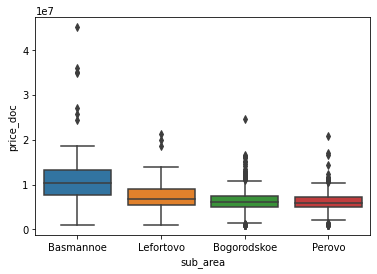

In [19]:
import seaborn as sns
areas = ["Лефортово", "Перово", "Басманное", "Богородское"]
areas = transkript(areas)
print(areas)
# отбор по условию вхождения в список названий
sns.boxplot(x='sub_area', y='price_doc', data=data_flats[data_flats.sub_area.isin(areas)])

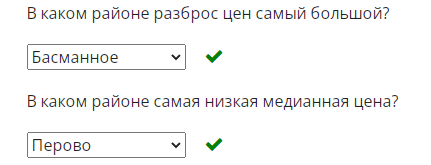

# 2.11. Feature Engineering
**Feature Engineering** — способ создания признаков, техника решения задач МО, которая увеличивает качество разрабатываемых алгоритмов. Превращает специфичные данные в понятные для модели векторы.

Способы:

- Ручное создание признаков
Новые признаки можно создавать на основе имеющихся, если понятно, что означает тот или иной признак. Техника может значительно улучшить модель, но требуется погружение в предметную область. Например, зная массу и рост человека, можно посчитать индекс массы тела; зная координаты места нарушения ПДД и центра города, можно посчитать расстояние между ними.

- Полиномиальные признаки
Например, попарное перемножение имеющихся столбцов, чтобы получить нелинейные комбинации признаков. Другой пример — возведение признаков в квадрат или корень из признака, чтобы получить искусственные признаки.

- Dummy-переменные
Между категориальными признаками не всегда есть порядок, поэтому их следует заменять на dummy-переменные, в виде цифр, чтобы алгоритм подумал, что в данных есть порядок. Например, лев, тигр, медведь лучше записать как 0, 1, 2. Расстояние между «лев» и «тигр» равно 1, а между «лев» и «медведь» — 2, хотя это не так. Решение — создать новые признаки по количеству категорий. Для признака «лев» значение будет 1, если это лев, иначе 0. Теперь расстояния между всеми признаками равны 1.

- Работа с датой/временем
Обычно дата — это строка, похожая на «2005-06-02». В таком виде признак имеет мало смысла, но его можно разделить на набор других признаков. Модель не принимает текст, поэтому заменяем его на набор других числовых признаков. Например, день, месяц, год или день недели, праздник/выходной.

- Статистики по наборам признаков
Если в данных есть признаки, описывающие значение в разные моменты времени, то они могут быть полезными. Например, зарплата_2016, зарплата_2017, зарплата_2018. Отсюда можно вытащить среднюю зарплату за 3 года, медианную зарплату, динамику зарплаты, максимальную и минимальную зарплату.


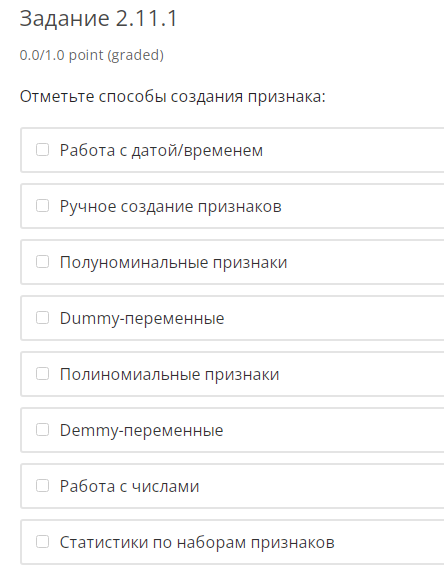

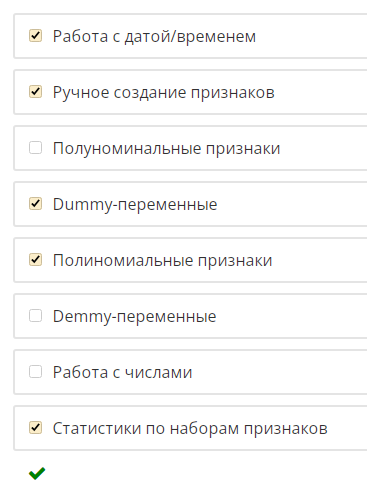

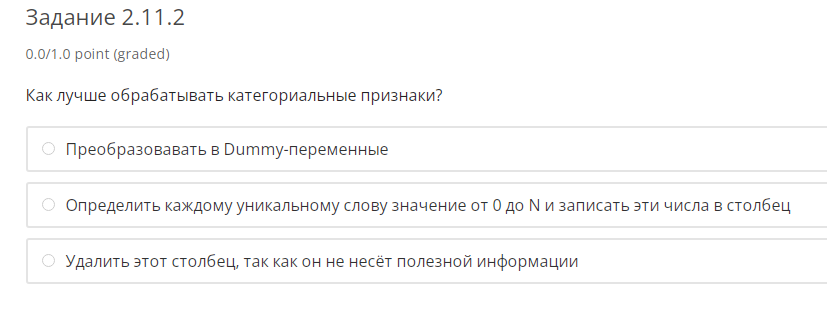

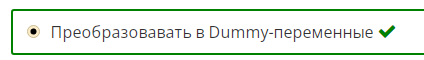

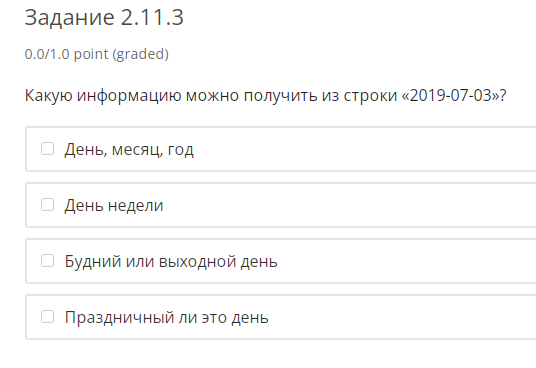

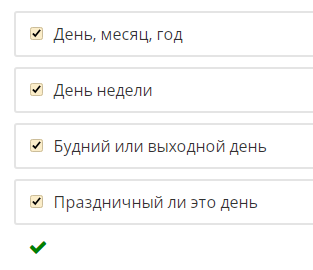

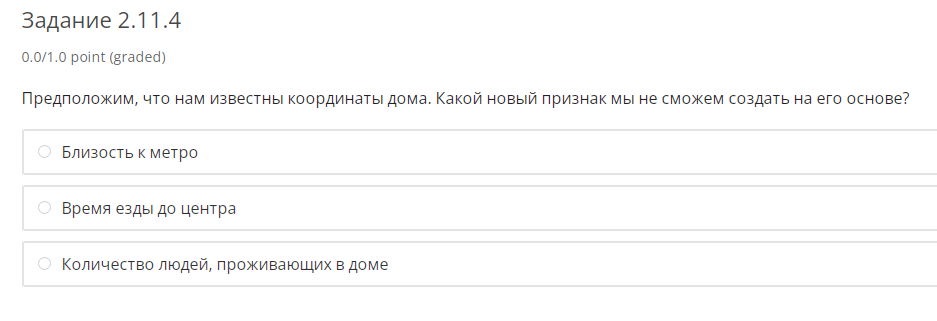

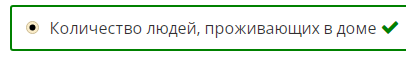

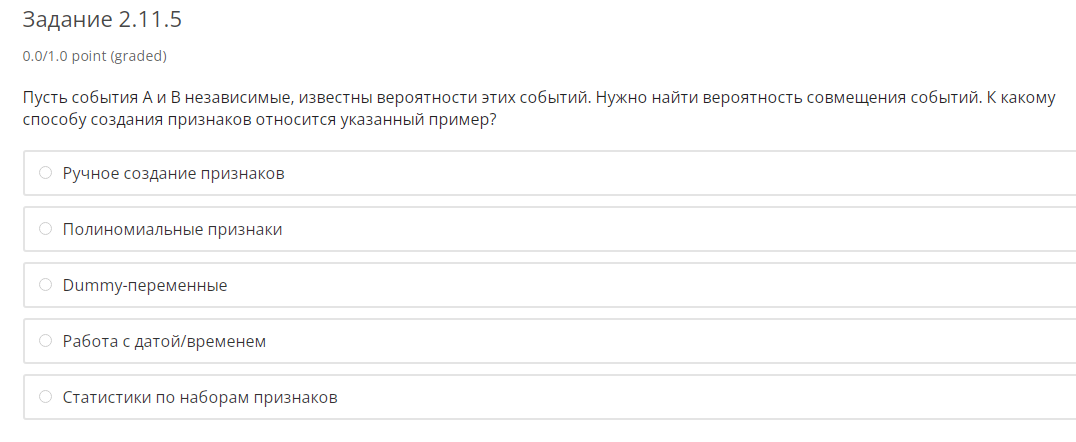

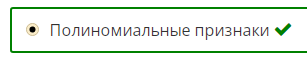

# 2.12. Практика
**Создание новых признаков** — трудоёмкий процесс, но он позволяет повысить точность модели при правильном использовании методов. Самое большое повышение точности обычно происходит после погружения Data Science разработчика в предметную область задачи.

Есть также автоматические/полуавтоматические методы создания новых признаков. Возьмём датасет vis_data и дополним его новой информацией:

In [20]:
import numpy as np
import pandas as pd
%matplotlib inline

vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

Существует несколько способов создания признаков, один из них — ручной метод, требующий погружение в предметную область. Более механический и менее интеллектуальный способ, является создание полиномиального признака. Новый признак получается путем перемножения и деления старых признаков друг на друга, а также для получения нового признака можно возводить старые в квадрат или извлекать корень.

In [21]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
poly_features
poly_features.shape

(250306, 6)

Если у нас есть категориальные признаки, то их желательно заменять на Dummy-переменные. Брать один признак и смотреть, сколько у него уникальных категорий.

Для того, чтобы делать Dummy-переменные в Pandas, есть метод get_dummies:

In [22]:
pd.get_dummies(vis_data.state).shape

(250306, 59)

Pandas поддерживает работу с датами. Выберем признак, содержащий время, уберём пропуски и преобразуем его в специальный формат для работы со временем:

In [23]:
datetime_vals = pd.to_datetime(vis_data.payment_date.dropna())
datetime_vals.head()

1    2005-06-02
11   2005-03-17
15   2005-02-11
18   2005-03-18
19   2005-03-18
Name: payment_date, dtype: datetime64[ns]

Дальше можно вытаскивать информацию о годе, месяце, дне недели.

In [24]:
datetime_vals[1].month

6

Данные для создания новых признаков можно использовать для расчёта различных статистик по данным. Например, минимум, максимум, стандартное отклонение и многие другие. Этот способ работает, если в данных содержится подобие временных рядов.

Ноутбук к скринкасту(m2_part4_feature_engineering.ipynb).

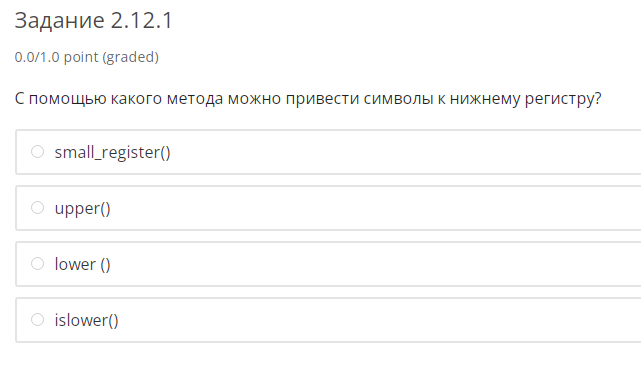

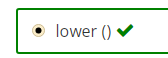

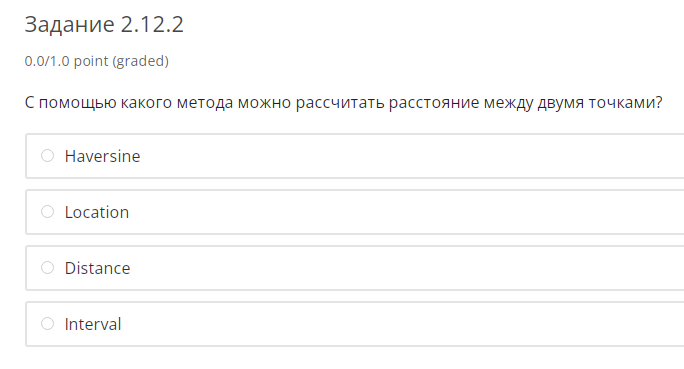

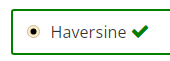

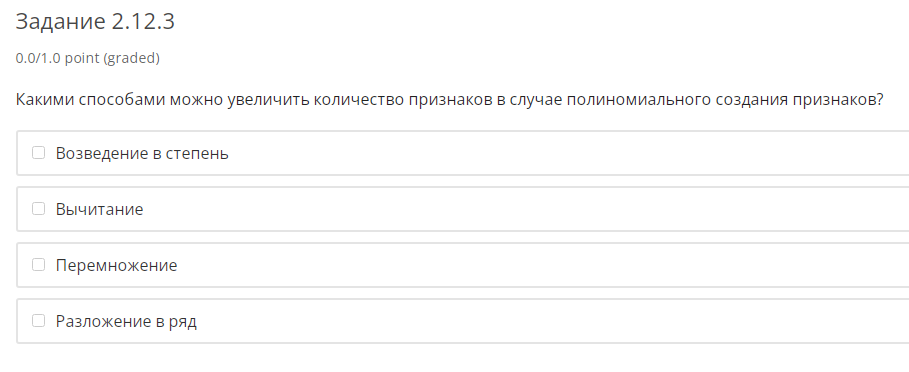

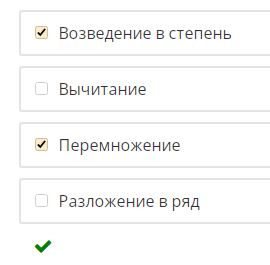

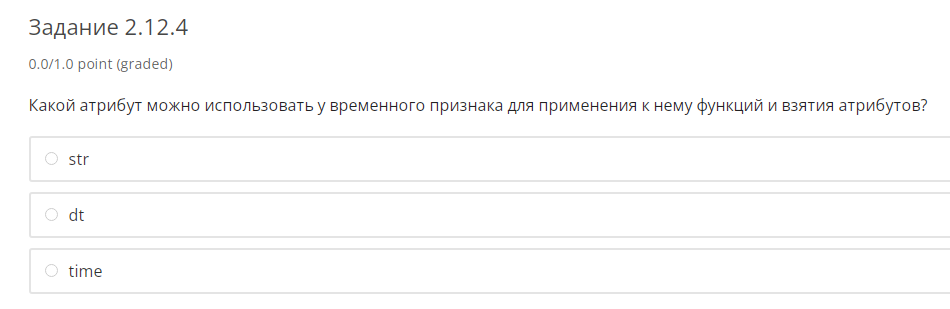

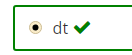

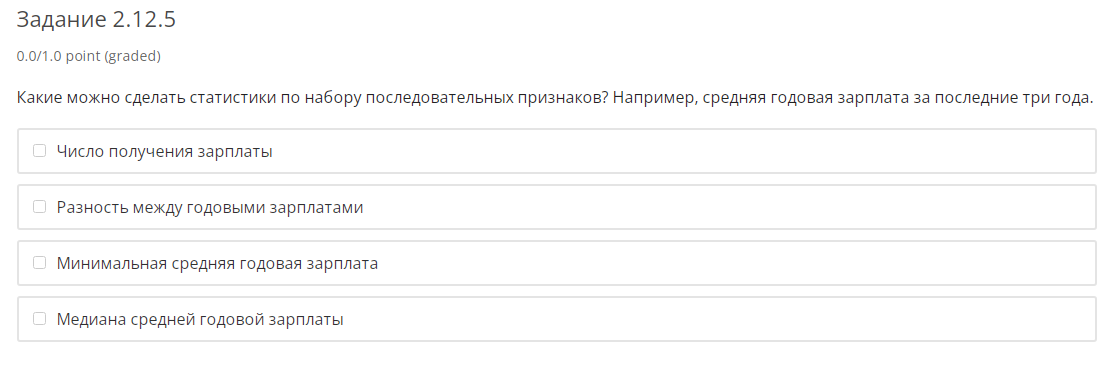

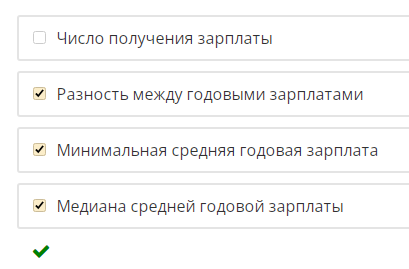

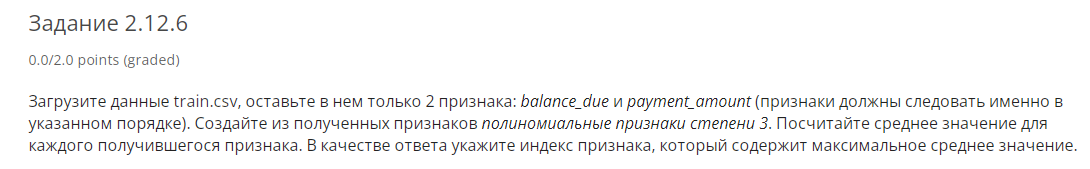

In [25]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
print(poly_features.mean(axis=0).argmax())

6


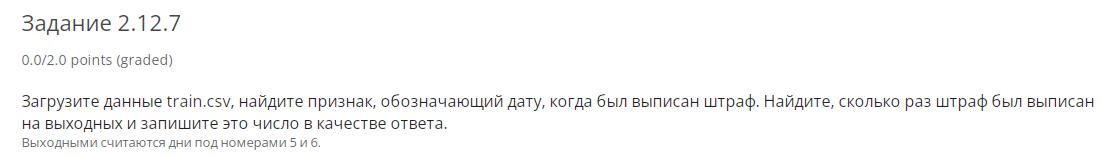

In [27]:
ticket_date = vis_data['ticket_issued_date'].dropna()
ticket_date = pd.to_datetime(ticket_date)
ticket_date = ticket_date[ticket_date.dt.day_of_week.isin([5, 6])]
display(ticket_date.count())
vis_data.info()

1620

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

# Практика на реальных данных
Ранее мы уже выяснили, что данные о квартирах не все числовые. Есть и признаки, которые содержат текстовые значения : ординальный (уровень экологии) и категориальный (район). Нам обязательно нужно перекодировать эти признаки, так как иначе мы не сможем в дальнейшем работать с этим датасетом и применять на нем какие-то математические алгоритмы. 

Ординальный признак мы можем перекодировать в числовой довольно простым способом: просто заменить каждое значение на число (4 - 'excellent', 3 - 'good' etc.).

Для этого необходимо:

 - создать словарь, сопоставляющий числовые значения от 0 до 4 описанию экологии от 'no data' до 'excellent' соответственно
 - заменить значения в колонке ecology на заданные нами выше с помощью метода .replace :

In [28]:
data = pd.read_csv('data_flats.csv',sep=";")
ecology_dict = {
    'excellent': 4,
    'good': 3,
    'satisfactory': 2,
    'poor': 1,
    'no data': 0
}
data.ecology = data.ecology.replace(to_replace=ecology_dict)

Теперь необходимо разобраться с переменной, содержащей информацию о районе.  Для этого воспользуйтесь методом get_dummies

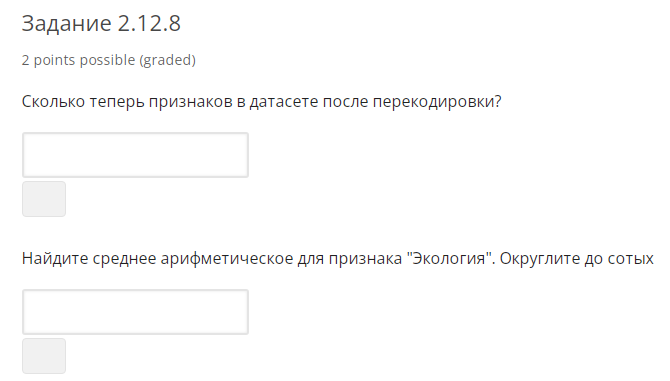

In [29]:
new_data = data.join(pd.get_dummies(data.sub_area), how='outer')

print(round(new_data.ecology.mean(), 2))
display(len(new_data.columns)-1)

1.73


201

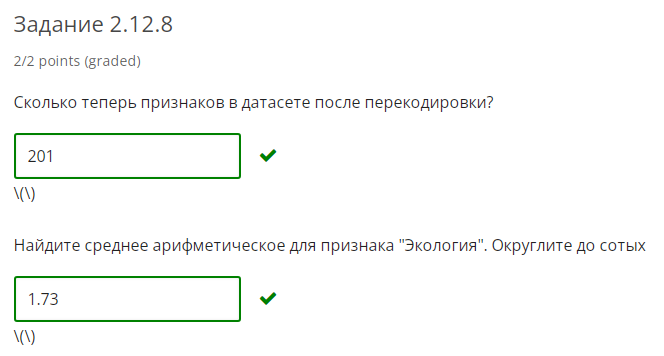

# 2.13. Поиск выбросов
**Выброс** — результат измерения, который выделяется из общей выборки. Выбросы появляются из-за ошибок в данных и сильно выделяющихся среди остальных значений. Их нужно искать и удалять, иначе данные будут подстраиваться под них и давать неверный результат.

**Как искать выбросы:**

- Поиск и удаление по порогу  
Способ нахождения выбросов, основанный на здравом смысле и методе пристального взгляда. Посмотреть данные и поискать невозможные и нелогичные значения, например, в столбце «высота здания» стоит 30 км.
- Поиск с помощью статистики  
Поиск с помощью здравого смысла трудно автоматизировать, поэтому эффективнее статистические методы. Например, поиск по отклонению или по распределению IQR (interquartile range, межквартильное расстояние).
- Поиск с помощью DBSCAN  
Поиск с помощью методов кластеризации, один из таких методов — DBSCAN, который может автоматически находить шум в данных.

Разные способы поиска выбросов могут давать разные результаты. Не всегда выделяющееся значение будет являться выбросом, возможно, у нас пока просто не хватает данных.

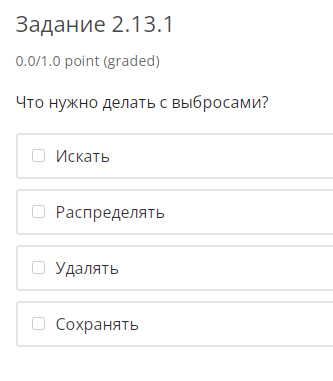

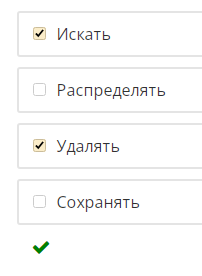

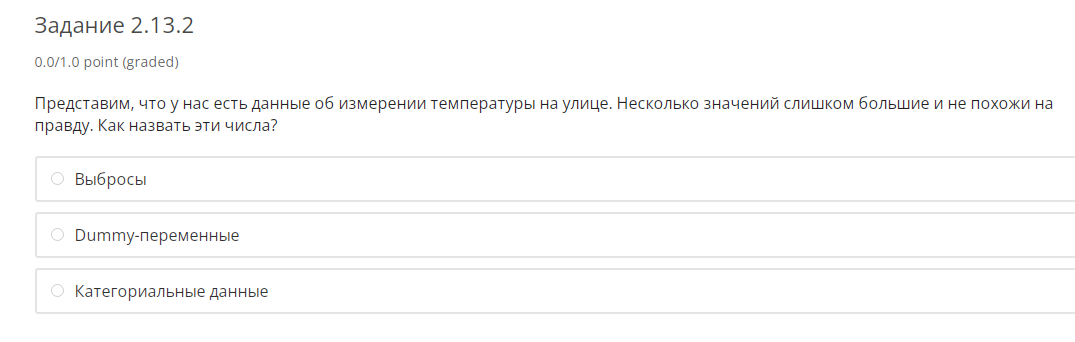

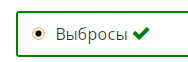

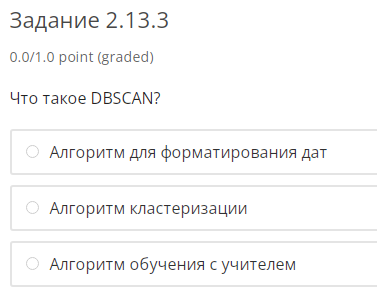

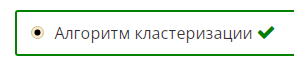

# 2.14. Практика
Рассмотрим тему поиска выбросов на том же примере со штрафами. Логически мы понимаем, что лишними будут значения штрафов меньше или равно 0. Поэтому проверим, что все данные больше этого значения:

In [30]:
np.sum(vis_data.fine_amount < 0)

0

Посмотрим максимальное значение штрафа и как часто такой штраф встречается в данных:

In [31]:
max_fine = np.max(vis_data.fine_amount)
max_fine

max_fine_count = np.sum(vis_data.fine_amount == max_fine)
max_fine_count, max_fine_count/vis_data.shape[0]

(357, 0.0014262542647799094)

Есть ещё один способ поиска выбросов — поиск по отклонению, где ищутся значения, на которое отклоняется данная точка от среднего. Это делается с помощью z-score — расстояния от среднего значения точек.

In [32]:
vis_data.distance[vis_data.distance > 30].hist()

def outliers_z_score(ys, threshold=3):
    mean_y = np.mean(ys)
    std_y = np.std(ys)
    z_scores = [(y - mean_y) / std_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)[0]

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    o = outliers_z_score(vis_data.distance)

len(o)

AttributeError: 'DataFrame' object has no attribute 'distance'

Другой способ — IQR (interquartile range, межквартильное расстояние) — использование перцентили (в нашем случае квартили) для определения, где находятся выбросы. Метод межквартильного расстояния выделяет как выбросы все значения, находящиеся за пределами коробки. Посмотрим, сколько выбросов он найдет:

In [40]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

Ещё один способ найти выбросы — поиск по распределению — построить нормальное распределение поверх данных, посчитать вероятность нахождения каждого значения в данном распределении. Самые невероятные значения будем считать выбросами.

In [ ]:
from scipy.stats import norm

def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def get_gaussian(mu, sigma):
    distribution = norm(mu, sigma)
    return distribution

def get_probs(distribution, dataset):
    return distribution.pdf(dataset)

Мы построили нормальное распределение на предоставленных данных и посчитали вероятность появления точки при данном распределении для каждого значения. Важно выбрать разумное значение вероятности, ниже которой точка будет считаться выбросом.

Последний способ, который мы рассмотрим, — алгоритм кластеризации DBSCAN, который определяет группы (кластеры) объектов. Кроме кластеров он находит отдельно стоящие элементы, «шум». Применим его для нахождения выбросов:

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

Когда выбросы могут быть важны?

Если мы занимаемся поиском аномалий (Anomaly Detection), выбросы — зависимые переменные, которые необходимо найти, но необязательно выбрасывать. 
Перечисленные способы не всегда могут выделить реальные выбросы, так как разные методы и параметры дают разные результаты.

Ноутбук к скринкасту m2_part5_outliers.

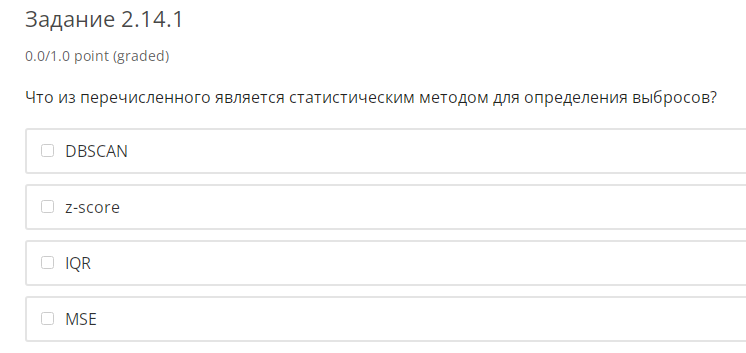

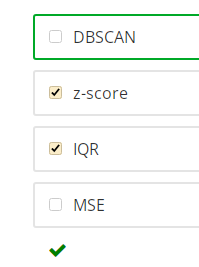

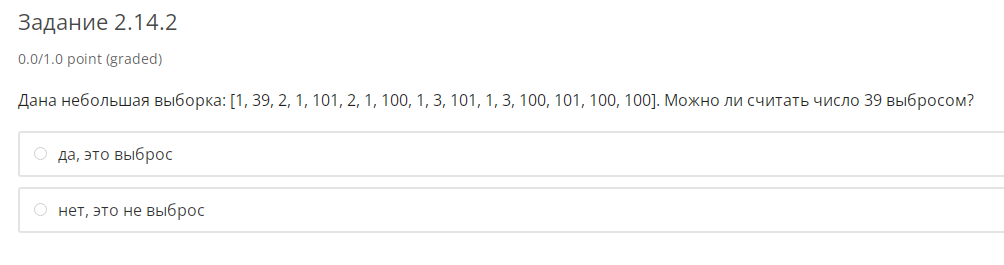

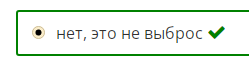

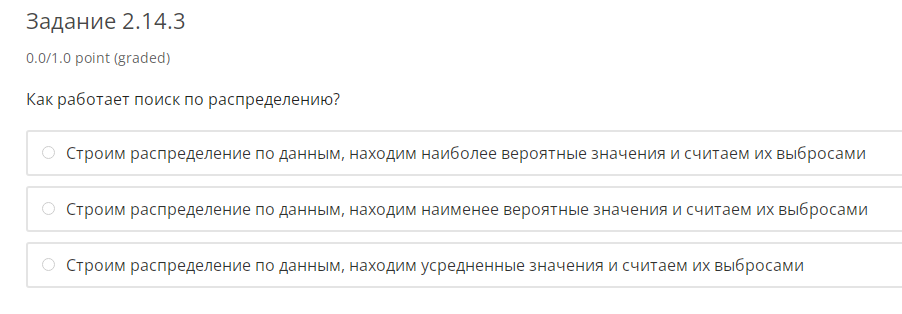

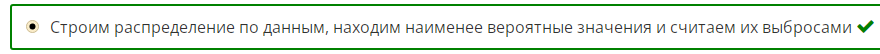

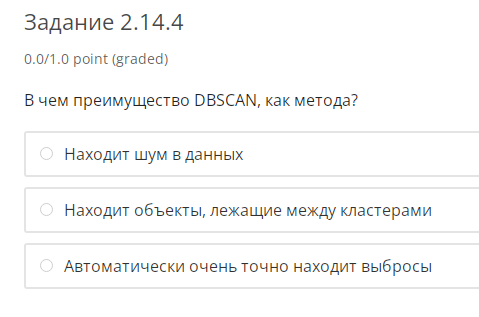

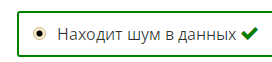

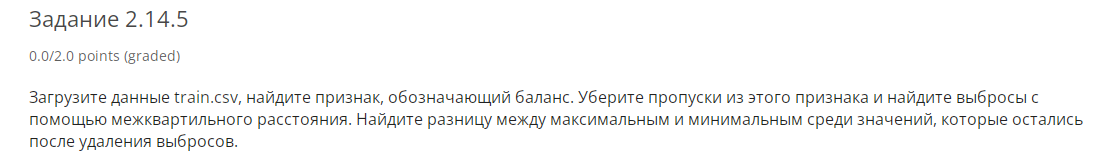

In [47]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [49]:
vis_data.balance_due = vis_data.balance_due.dropna()
vis_data.balance_due = vis_data.balance_due.drop(outliers_iqr(vis_data.balance_due))
print(vis_data.balance_due.max() - vis_data.balance_due.min())

1201.3


In [45]:
display(vis_data.balance_due)
vis_data.info()

0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 250306, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       